<a href="https://colab.research.google.com/github/cyber-prags/ML-and-BioOptimization/blob/main/N_arm_bandit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_arms_options = [5, 10, 20]  # List of n-arms to iterate over
n_plays = 2000
epsilon_options = [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1]  # Different epsilon values to test



In [2]:
# Function to run the bandit algorithm
def run_epsilon_greedy_bandit(n_arms, epsilon):
    # Generate random reward probabilities for each arm
    reward_probabilities = np.random.rand(n_arms)

    q_values = np.zeros(n_arms)  # Estimated values of each arm
    n_selected = np.zeros(n_arms)  # Number of times each arm was selected
    total_reward = 0
    rewards = []
    optimal_action_count = []

    # Run the bandit algorithm
    for play in range(n_plays):
        # Exploration vs exploitation
        if np.random.rand() < epsilon:
            # Explore: select a random arm
            chosen_arm = np.random.choice(n_arms)
        else:
            # Exploit: select the arm with the highest estimated value
            chosen_arm = np.argmax(q_values)

        # Simulate pulling the arm
        reward = np.random.rand() < reward_probabilities[chosen_arm]
        rewards.append(reward)
        total_reward += reward
        n_selected[chosen_arm] += 1

        # Update the estimated value (Q-value) for the chosen arm
        q_values[chosen_arm] += (reward - q_values[chosen_arm]) / n_selected[chosen_arm]

        # Check if the optimal arm is chosen
        optimal_arm = np.argmax(reward_probabilities)
        is_optimal = chosen_arm == optimal_arm
        optimal_action_count.append(is_optimal)

    # Calculate average reward and optimal action percentage
    average_rewards = np.cumsum(rewards) / np.arange(1, n_plays + 1)
    optimal_action_percentages = np.cumsum(optimal_action_count) / np.arange(1, n_plays + 1) * 100

    return q_values, total_reward, rewards, optimal_action_count, average_rewards, optimal_action_percentages



Results for n_arms=5 with best epsilon=0.05:
Q-values for the arms: [0.10178117 0.11056511 0.15424165 0.15346535 0.88943489]
Total reward: 569
Percentage of optimal action: 20.349999999999998
Rewards: [True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, False, False, True, False, False, True, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, 

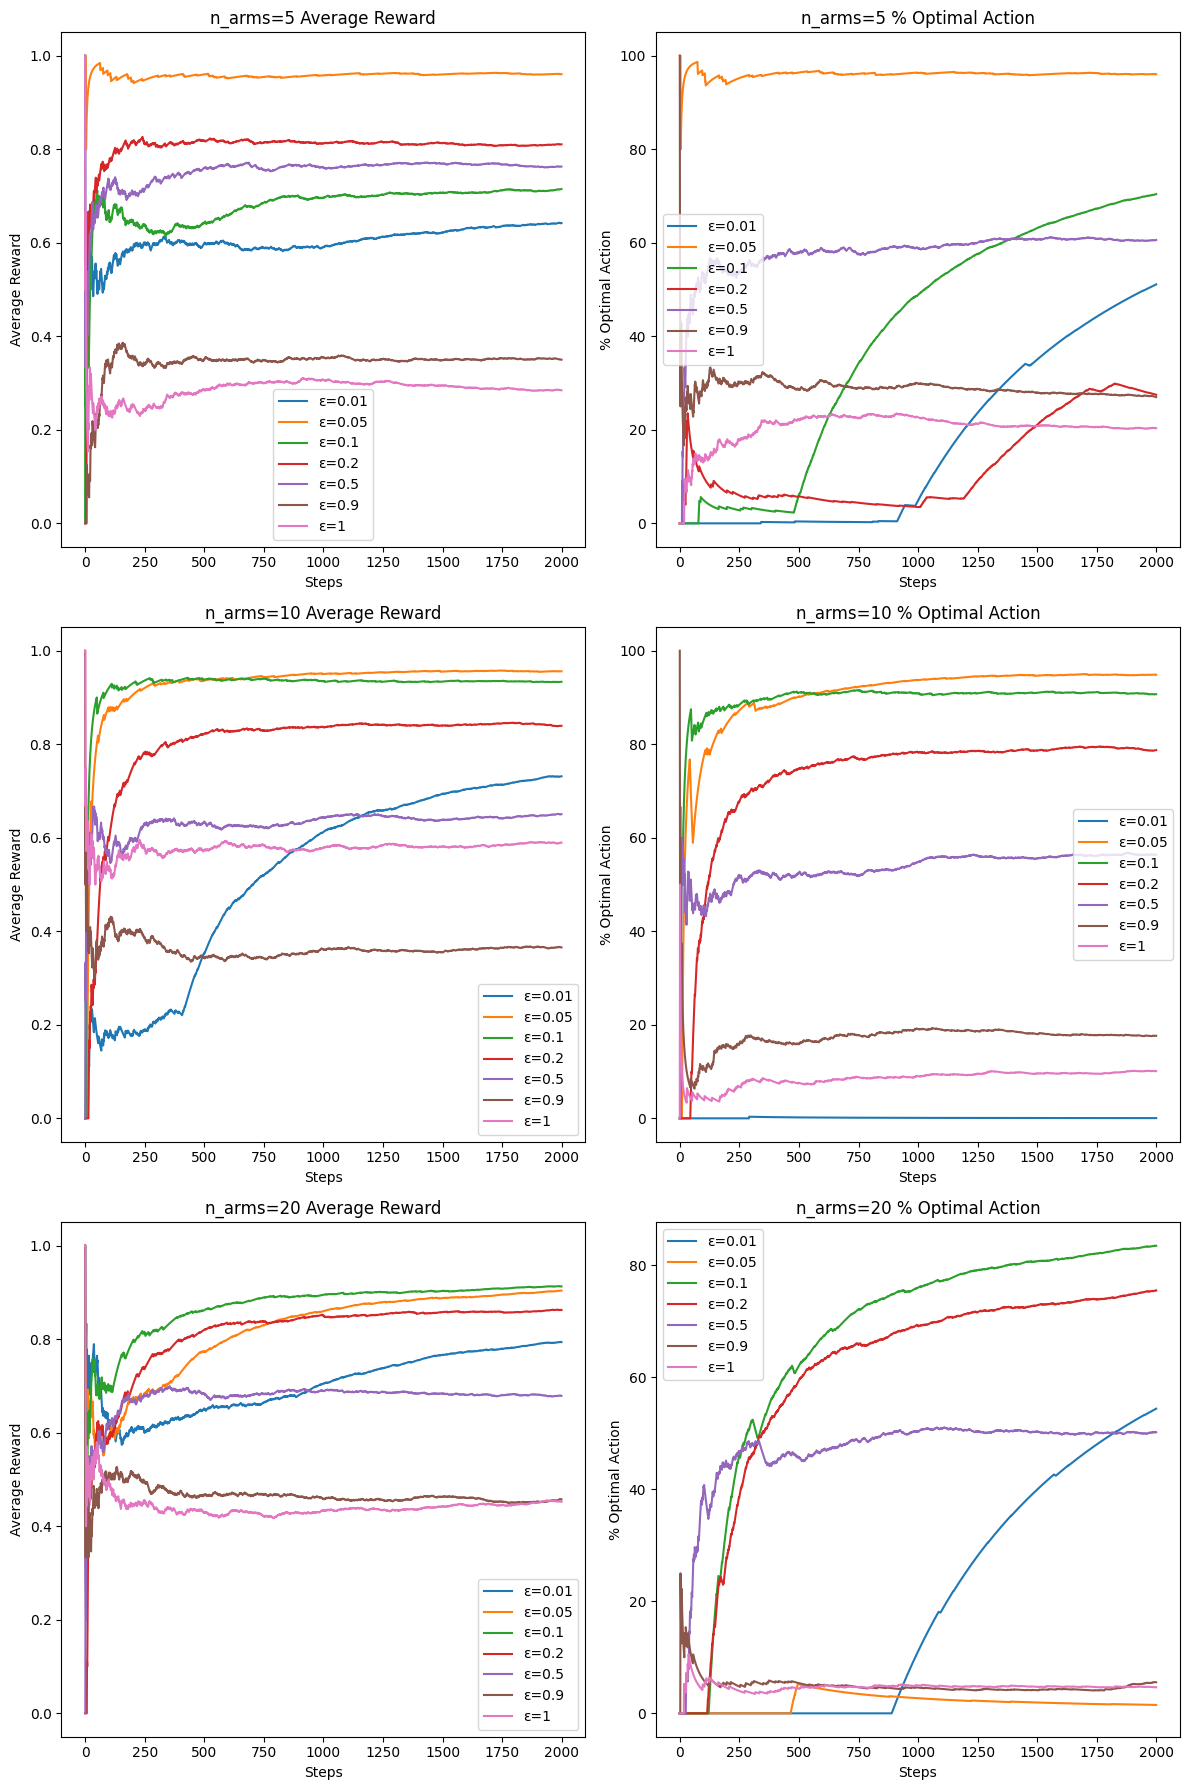

In [3]:
# Initialize separate plots for average reward and % optimal action
fig, axes = plt.subplots(len(n_arms_options), 2, figsize=(12, 6 * len(n_arms_options)))

# Loop over different values of n_arms
for i, n_arms in enumerate(n_arms_options):
    best_epsilon = None
    best_average_reward = 0

    # Run the bandit for different epsilon values
    for epsilon in epsilon_options:
        q_values, total_reward, rewards, optimal_action_count, average_rewards, optimal_action_percentages = run_epsilon_greedy_bandit(n_arms, epsilon)

        # Update the best_epsilon if the current one is better
        if average_rewards[-1] > best_average_reward:
            best_average_reward = average_rewards[-1]
            best_epsilon = epsilon

        # Plotting
        axes[i, 0].plot(average_rewards, label=f'ε={epsilon}')
        axes[i, 1].plot(optimal_action_percentages, label=f'ε={epsilon}')

    # Printing the results for the best epsilon
    print(f"Results for n_arms={n_arms} with best epsilon={best_epsilon}:")
    print("Q-values for the arms:", q_values)
    print("Total reward:", total_reward)
    print("Percentage of optimal action:", np.mean(optimal_action_count) * 100)
    print("Rewards:", rewards)
    print("\n")

    # Set labels and titles
    axes[i, 0].set_title(f'n_arms={n_arms} Average Reward')
    axes[i, 0].set_xlabel('Steps')
    axes[i, 0].set_ylabel('Average Reward')
    axes[i, 0].legend()

    axes[i, 1].set_title(f'n_arms={n_arms} % Optimal Action')
    axes[i, 1].set_xlabel('Steps')
    axes[i, 1].set_ylabel('% Optimal Action')
    axes[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()